In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the metric names in the order provided
metric_names = [
    "PixCorr", "SSIM", "AlexNet(2)", "AlexNet(5)", "InceptionV3", "CLIP", 
    "EffNet-B", "SwAV", "FwdRetrieval", "BwdRetrieval", "Brain Corr. nsd_general", 
    "Brain Corr. V1", "Brain Corr. V2", "Brain Corr. V3", "Brain Corr. V4", 
    "Brain Corr. higher_vis"
]

# List of CSV file paths - Replace with your actual file paths
csv_files = ['tables/cont_blur_all_recons.csv', 'tables/cont_prior_all_recons.csv', 'tables/only_cont_all_recons.csv', 'tables/control_MEV2_all_recons.csv', 'tables/only_prior_all_recons.csv', 'tables/prior_blurry_all_recons.csv']
# Initialize an empty list to store the dataframes
vals = []

# Read each CSV file, transpose the DataFrame, and drop the first column
for file in csv_files:
    df = pd.read_csv(file)
    df = df.iloc[:]  # Drop the first row which is the index from the original CSV
    df.reset_index(drop=True, inplace=True)
    arr = df.to_numpy()
    vals.append(arr)
    # dataframes.append(df)
    

# Plotting
# plt.figure(figsize=(15, 10))

# # Now each CSV file's data should be in a single row after transposing and dropping the index column
# for i, df in enumerate(dataframes):
#     plt.plot(metric_names, df.iloc[0], marker='o', label=f'CSV File {i+1}')

# plt.xlabel('Metrics')
# plt.ylabel('Values')
# plt.title('Comparison of Metrics across CSV Files')
# plt.xticks(rotation=45)
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [13]:
vals

[array([[ 0.16761821],
        [ 0.24845667],
        [ 0.55351552],
        [ 0.54361562],
        [ 0.52873073],
        [ 0.51357758],
        [ 0.98839706],
        [ 0.71534172],
        [ 0.97144447],
        [ 0.93344446],
        [ 0.02686348],
        [ 0.01396643],
        [-0.00249199],
        [ 0.01385047],
        [ 0.02516499],
        [ 0.03885042]]),
 array([[0.23828223],
        [0.33271732],
        [0.91973473],
        [0.97336937],
        [0.92096597],
        [0.88904104],
        [0.71391295],
        [0.39822734],
        [0.98066669],
        [0.95833337],
        [0.36690566],
        [0.34639612],
        [0.34960821],
        [0.3466652 ],
        [0.32760873],
        [0.35769883]]),
 array([[ 6.29187050e-02],
        [ 3.09483724e-01],
        [ 4.98799800e-01],
        [ 5.07138138e-01],
        [ 5.22985986e-01],
        [ 5.00773774e-01],
        [ 9.90511701e-01],
        [ 6.88840622e-01],
        [ 9.68777808e-01],
        [ 9.12000024e-01],
      

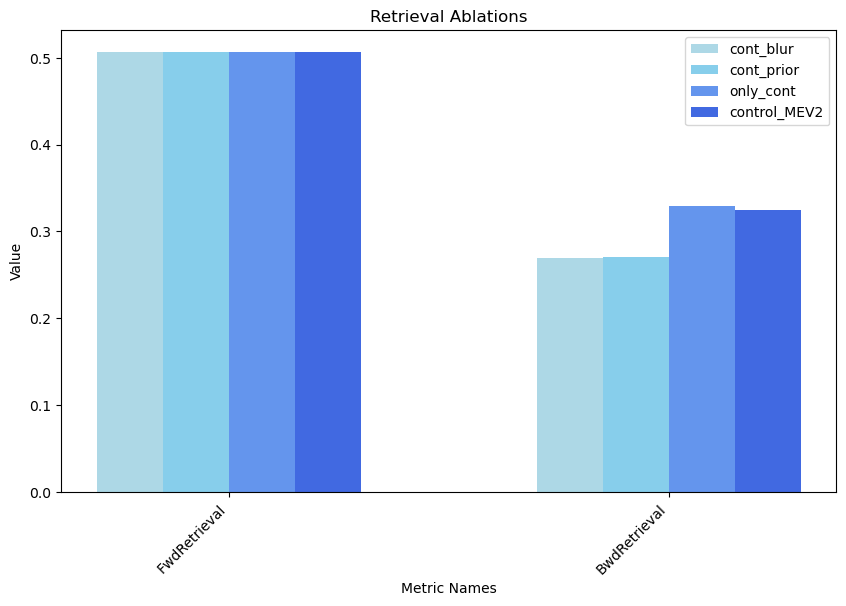

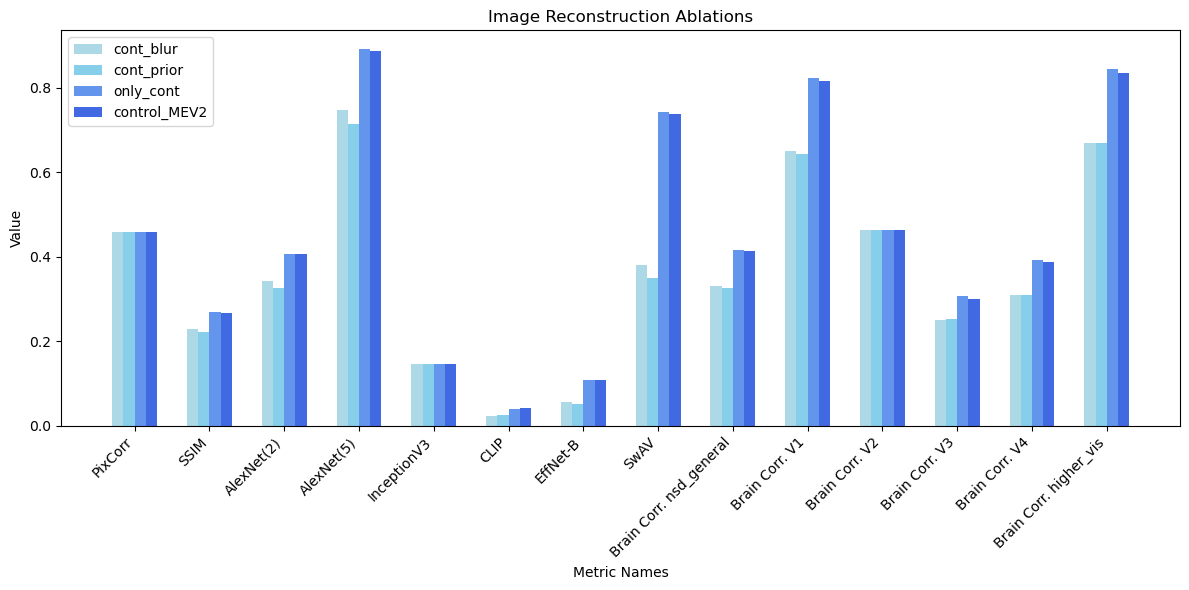

In [36]:
import matplotlib.pyplot as plt
import numpy as np

pretty_blues = ['#ADD8E6', '#87CEEB', '#6495ED', '#4169E1', '#0000FF', '#00008B']


# Specific metric names
metric_names = [
    "PixCorr", "SSIM", "AlexNet(2)", "AlexNet(5)", "InceptionV3", "CLIP", 
    "EffNet-B", "SwAV", "FwdRetrieval", "BwdRetrieval", "Brain Corr. nsd_general", 
    "Brain Corr. V1", "Brain Corr. V2", "Brain Corr. V3", "Brain Corr. V4", 
    "Brain Corr. higher_vis"
]

# Your vals as a list of arrays
sources = ['cont_blur', 'cont_prior', 'only_cont', 'control_MEV2', 'only_prior', 'prior_blurry']
# Initialize an empty list to store the dataframes

# Number of data sources and metrics
num_sources = len(vals)
num_metrics = len(metric_names)

# Calculate x-coordinates for each group of bars
bar_width = 0.15
x_coords_retrieval = np.arange(2)  # We only have two retrieval metrics
x_coords_image = np.arange(num_metrics - 2)  # Exclude the retrieval metrics

# Data source labels for the legend
data_source_labels = [i for i in sources]

# Plot for Retrieval Ablations
fig1, ax1 = plt.subplots(figsize=(10, 6))
for i in range(num_sources):
    fwd_bwd_vals = [vals[i][metric_names.index('FwdRetrieval')][0], 
                    vals[i][metric_names.index('BwdRetrieval')][0]]
    ax1.bar(x_coords_retrieval + i * bar_width, fwd_bwd_vals, bar_width, color=pretty_blues[i], label=data_source_labels[i])

ax1.set_xlabel('Metric Names')
ax1.set_ylabel('Value')
ax1.set_title('Retrieval Ablations')
ax1.set_xticks(x_coords_retrieval + bar_width * (num_sources - 1) / 2)
ax1.set_xticklabels(['FwdRetrieval', 'BwdRetrieval'], rotation=45, ha='right')
ax1.legend()

# Plot for Image Reconstruction Ablations
fig2, ax2 = plt.subplots(figsize=(12, 6))
other_metrics = [metric for metric in metric_names if metric not in ['FwdRetrieval', 'BwdRetrieval']]
for i in range(num_sources):
    other_vals = [vals[i][metric_names.index(metric)][0] for metric in other_metrics]
    ax2.bar(x_coords_image + i * bar_width, other_vals, bar_width, color=pretty_blues[i], label=data_source_labels[i])

ax2.set_xlabel('Metric Names')
ax2.set_ylabel('Value')
ax2.set_title('Image Reconstruction Ablations')
ax2.set_xticks(x_coords_image + bar_width * (num_sources - 1) / 2)
ax2.set_xticklabels(other_metrics, rotation=45, ha='right')
ax2.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the metric names in the order provided
metric_names = ["Bleu_1_img_ref",
            "Blue_1_brain_ref",
            "Bleu_1_brain_img",
            "Bleu_1_relative",
            "Bleu_4_img_ref",
            "Blue_4_brain_ref",
            "Bleu_4_brain_img",
            "Bleu_4_relative",
            "Rouge1_img_ref",
            "Rouge1_brain_ref",
            "Rouge1_brain_img",
            "Rouge1_relative",
            "RougeL_img_ref",
            "RougeL_brain_ref",
            "RougeL_brain_img",
            "RougeL_relative",
            "Meteor_img_ref",
            "Meteor_brain_ref",
            "Meteor_brain_img",
            "Meteor_relative",
            "Sentence_img_ref",
            "Sentence_brain_ref",
            "Sentence_brain_img",
            "Sentence_relative",
            "CLIP_img_ref",
            "CLIP_brain_ref",
            "CLIP_brain_img",
            "CLIP_relative"]

# List of CSV file paths - Replace with your actual file paths
csv_files = ['tables/only_prior_all_recons_caption_metrics.csv', 'tables/prior_blurry_all_recons_caption_metrics.csv', 'tables/cont_prior_all_recons_caption_metrics.csv', 'tables/control_MEV2_all_recons_caption_metrics.csv']
# Initialize an empty list to store the dataframes
vals = []

# Read each| CSV file, transpose the DataFrame, and drop the first column
for file in csv_files:
    df = pd.read_csv(file)
    df = df.iloc[:]  # Drop the first row which is the index from the original CSV
    df.reset_index(drop=True, inplace=True)
    arr = df.to_numpy()
    vals.append(arr)
    # dataframes.append(df)
    

# Plotting

In [31]:
vals

[array([[0.45718309],
        [0.22913607],
        [0.34123799],
        [0.74639241],
        [0.1464971 ],
        [0.02385634],
        [0.05583158],
        [0.38111047],
        [0.50669969],
        [0.26972888],
        [0.32953892],
        [0.65036337],
        [0.46368459],
        [0.25076899],
        [0.31040642],
        [0.66943441],
        [0.419676  ],
        [0.17752672],
        [0.23118672],
        [0.55086954],
        [0.75425076],
        [0.22709644],
        [0.22460184],
        [0.29778138],
        [0.83923835],
        [0.63724506],
        [0.64260983],
        [0.765706  ]]),
 array([[0.45718309],
        [0.22184573],
        [0.32617668],
        [0.7134487 ],
        [0.1464971 ],
        [0.02449801],
        [0.05133526],
        [0.35041827],
        [0.50669969],
        [0.27031472],
        [0.32600642],
        [0.64339179],
        [0.46368459],
        [0.2524811 ],
        [0.3096086 ],
        [0.66771379],
        [0.419676  ],
        

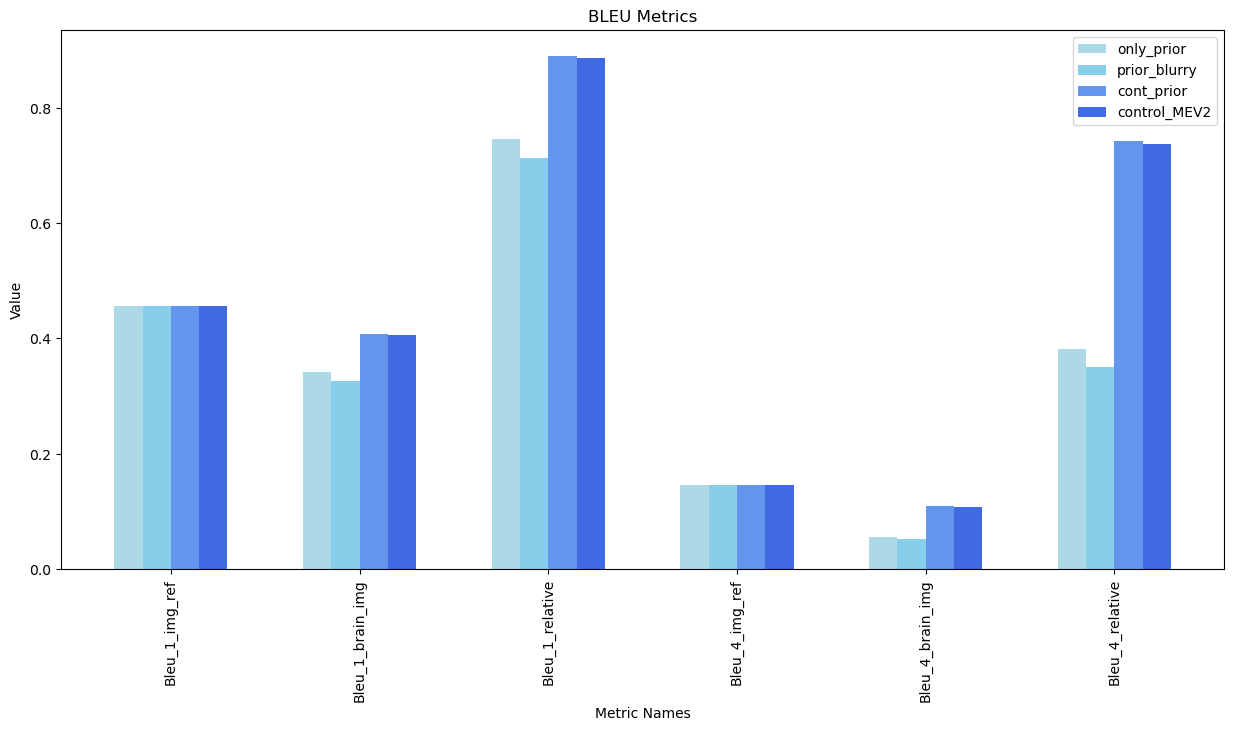

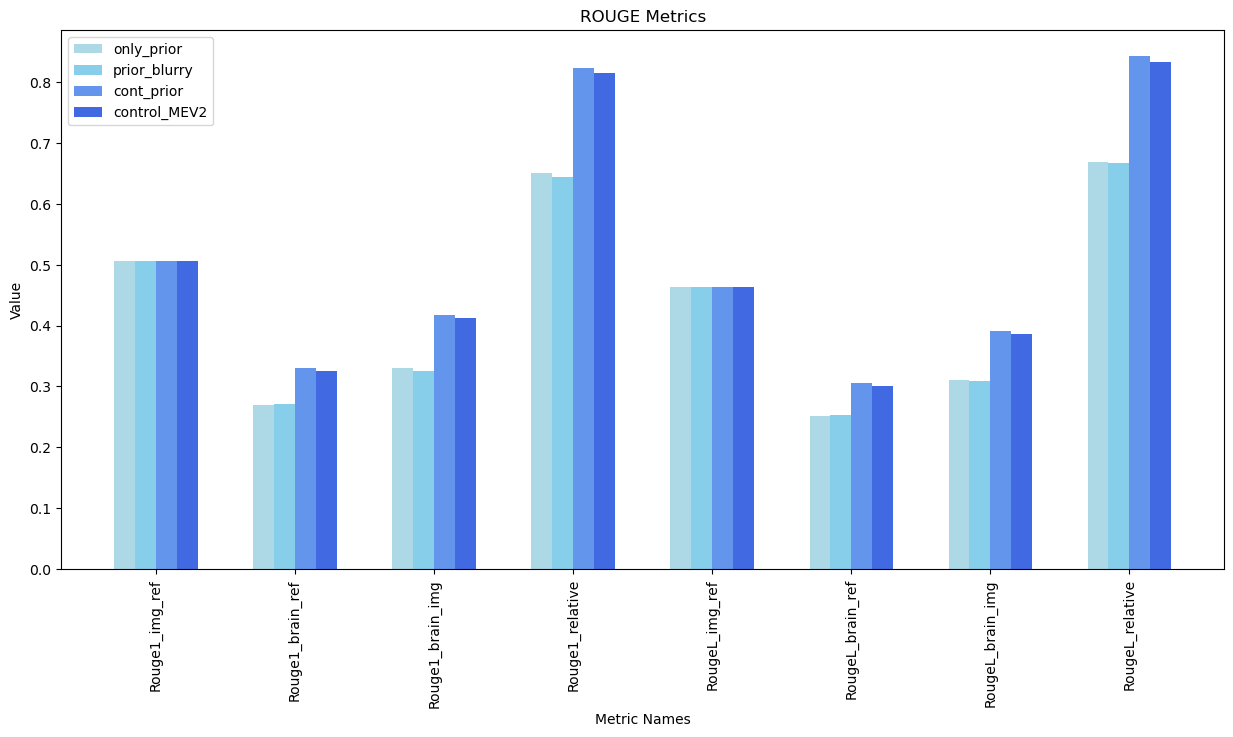

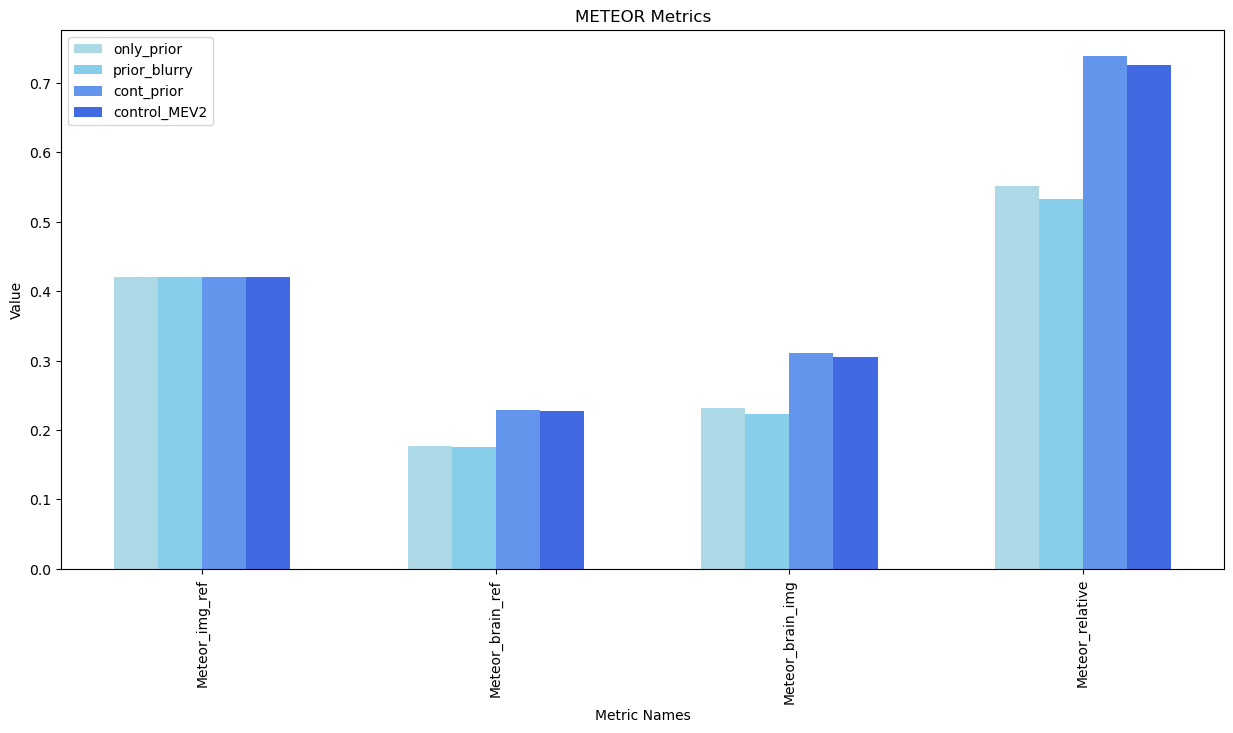

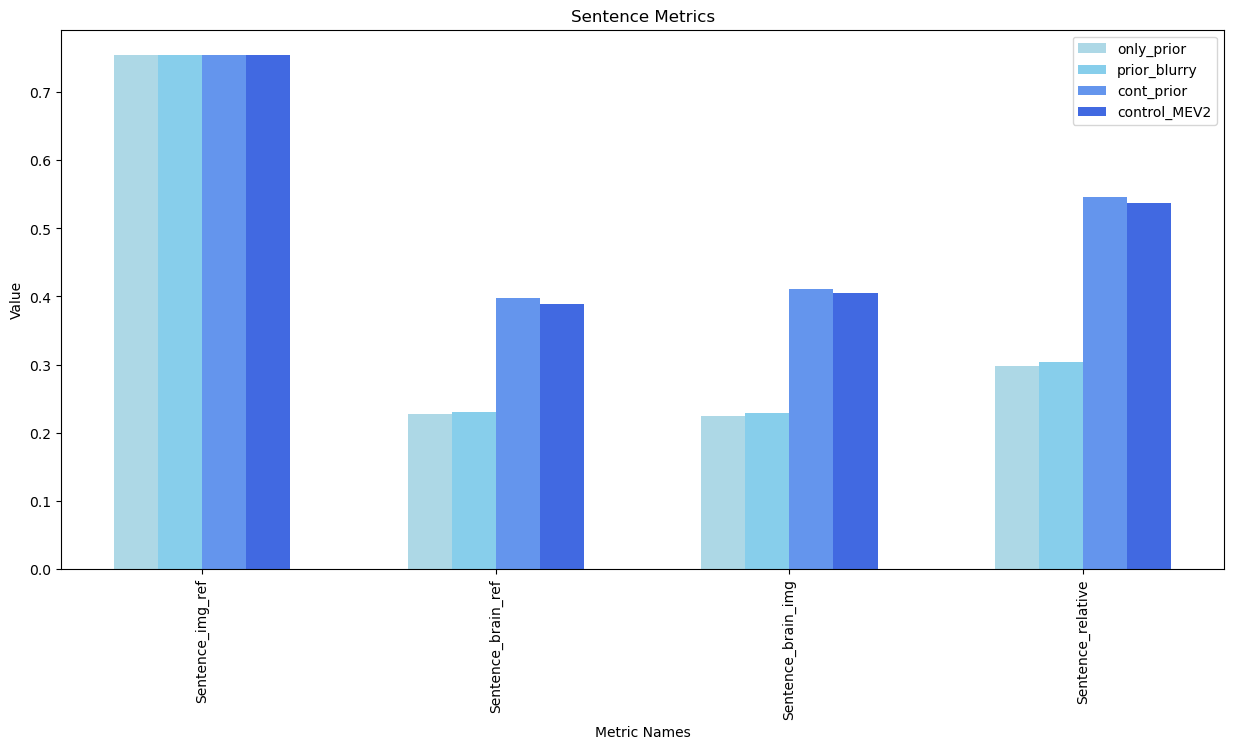

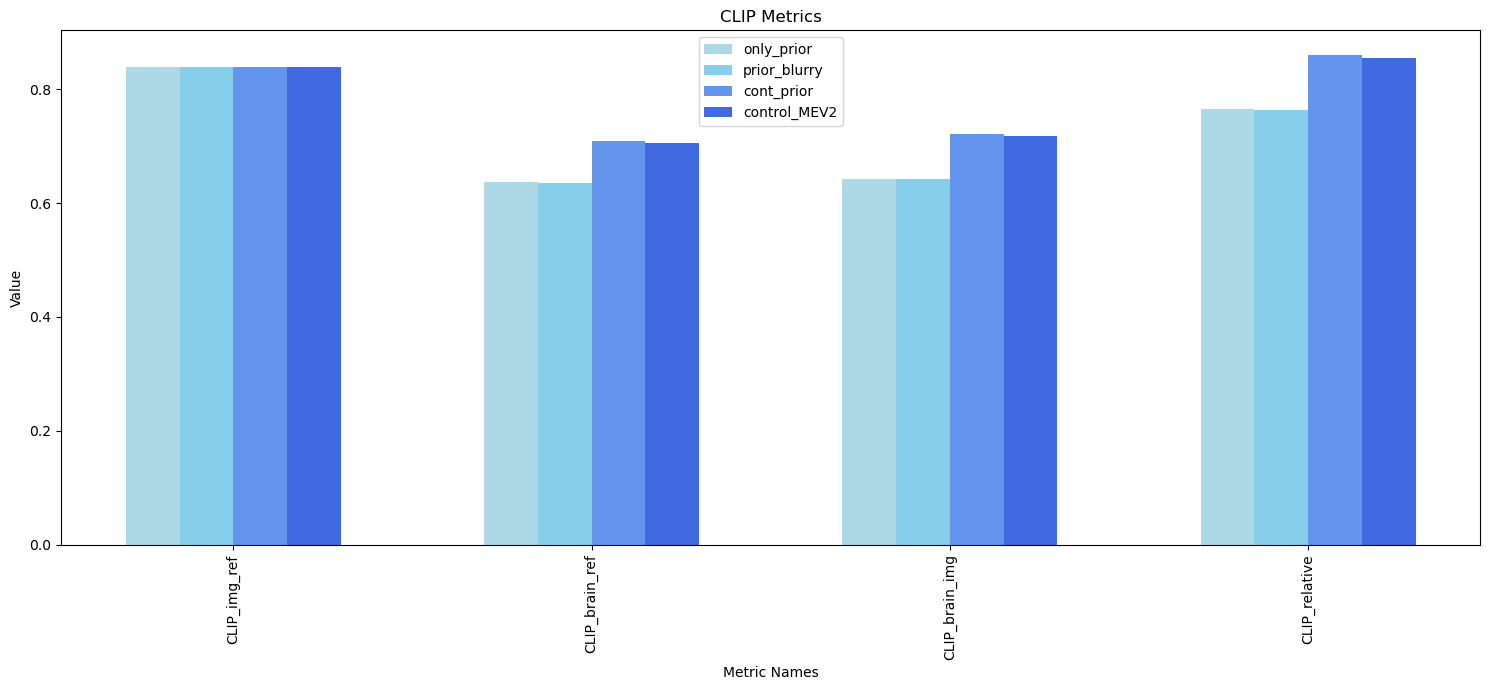

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Metric names
metric_names = [
    "Bleu_1_img_ref", "Blue_1_brain_ref", "Bleu_1_brain_img", "Bleu_1_relative",
    "Bleu_4_img_ref", "Blue_4_brain_ref", "Bleu_4_brain_img", "Bleu_4_relative",
    "Rouge1_img_ref", "Rouge1_brain_ref", "Rouge1_brain_img", "Rouge1_relative",
    "RougeL_img_ref", "RougeL_brain_ref", "RougeL_brain_img", "RougeL_relative",
    "Meteor_img_ref", "Meteor_brain_ref", "Meteor_brain_img", "Meteor_relative",
    "Sentence_img_ref", "Sentence_brain_ref", "Sentence_brain_img", "Sentence_relative",
    "CLIP_img_ref", "CLIP_brain_ref", "CLIP_brain_img", "CLIP_relative"
]


# Revised code considering the provided 'vals' structure

# Flatten the arrays for easier plotting
vals_flattened = [[val[0] for val in source] for source in vals]

# Adjusting the number of colors to match the number of data sources
num_sources = len(vals)
contrastive_blues = ['#ADD8E6', '#87CEEB', '#6495ED', '#4169E1']
data_source_labels = ['only_prior', 'prior_blurry', 'cont_prior', 'control_MEV2']

# Function to plot each set of metrics
def plot_metrics(ax, metrics, title):
    x_coords = np.arange(len(metrics))
    for i in range(num_sources):
        vals_per_source = [vals_flattened[i][metric_names.index(m)] for m in metrics]
        ax.bar(x_coords + i * bar_width, vals_per_source, bar_width, color=contrastive_blues[i], label=data_source_labels[i])
    ax.set_xlabel('Metric Names')
    ax.set_ylabel('Value')
    ax.set_title(title)
    ax.set_xticks(x_coords + bar_width * (num_sources - 1) / 2)
    ax.set_xticklabels(metrics, rotation=90, ha='center')
    ax.legend()

# Creating plots for each metric type
fig_bleu, ax_bleu = plt.subplots(figsize=(15, 7))
plot_metrics(ax_bleu, bleu_metrics, 'BLEU Metrics')

fig_rouge, ax_rouge = plt.subplots(figsize=(15, 7))
plot_metrics(ax_rouge, rouge_metrics, 'ROUGE Metrics')

fig_meteor, ax_meteor = plt.subplots(figsize=(15, 7))
plot_metrics(ax_meteor, meteor_metrics, 'METEOR Metrics')

fig_sentence, ax_sentence = plt.subplots(figsize=(15, 7))
plot_metrics(ax_sentence, sentence_metrics, 'Sentence Metrics')

fig_clip, ax_clip = plt.subplots(figsize=(15, 7))
plot_metrics(ax_clip, clip_metrics, 'CLIP Metrics')

# Show all plots
plt.tight_layout()
plt.show()




In [5]:
from functools import partial
import torch.nn as nn
class BrainNetwork(nn.Module):
    def __init__(self, out_dim=768, in_dim=15724, clip_size=768, h=4096, n_blocks=4, norm_type='ln', act_first=False, use_projector=True):
        super().__init__()
        norm_func = partial(nn.BatchNorm1d, num_features=h) if norm_type == 'bn' else partial(nn.LayerNorm, normalized_shape=h)
        act_fn = partial(nn.ReLU, inplace=True) if norm_type == 'bn' else nn.GELU
        act_and_norm = (act_fn, norm_func) if act_first else (norm_func, act_fn)
        # self.temp = nn.Parameter(torch.tensor(.006))
        self.lin0 = nn.Sequential(
            nn.Linear(in_dim, h),
            *[item() for item in act_and_norm],
            nn.Dropout(0.5),
        )
        self.mlp = nn.ModuleList([
            nn.Sequential(
                nn.Linear(h, h),
                *[item() for item in act_and_norm],
                nn.Dropout(0.15)
            ) for _ in range(n_blocks)
        ])
        self.lin1 = nn.Linear(h, out_dim, bias=True)
        self.n_blocks = n_blocks
        self.clip_size = clip_size
        
        self.use_projector = use_projector
        if use_projector:
            self.projector = nn.Sequential(
                nn.LayerNorm(clip_size),
                nn.GELU(),
                nn.Linear(clip_size, 2048),
                nn.LayerNorm(2048),
                nn.GELU(),
                nn.Linear(2048, 2048),
                nn.LayerNorm(2048),
                nn.GELU(),
                nn.Linear(2048, clip_size)
            )
        
    def forward(self, x):
        '''
            bs, 1, 15724 -> bs, 32, h
            bs, 32, h -> bs, 32h
            b2, 32h -> bs, 768
        '''
        if x.ndim == 4:
            # case when we passed 3D data of shape [N, 81, 104, 83]
            assert x.shape[1] == 81 and x.shape[2] == 104 and x.shape[3] == 83
            # [N, 699192]
            x = x.reshape(x.shape[0], -1)

        x = self.lin0(x)  # bs, h
        residual = x
        for res_block in range(self.n_blocks):
            x = self.mlp[res_block](x)
            x += residual
            residual = x
        x = x.reshape(len(x), -1)
        x = self.lin1(x)
        if self.use_projector:
            return x, self.projector(x.reshape(len(x), -1, self.clip_size))
        return x

In [12]:
import torch
x = torch.randn([2, 15724])
m = BrainNetwork(in_dim=15724, out_dim= 197376, clip_size= 768, use_projector= True)
y, t = m(x)
y.shape

torch.Size([2, 197376])

In [9]:
t.shape

torch.Size([2, 1, 768])

In [2]:
import os
from PIL import Image
import torch
from torchvision import transforms
import re
from tqdm import tqdm
import utils

def natural_sort_key(s, _nsre=re.compile('([0-9]+)')):
    return [int(text) if text.isdigit() else text.lower() for text in re.split(_nsre, s)]  

def load_images_to_tensor(directory):
    # Transformation: convert images to tensors
    transform = transforms.ToTensor()

    # List to hold all tensors
    tensor_list = []

    # Iterate through all the files in the directory
    image_files = [f for f in os.listdir(directory) if f.endswith('.jpg') or f.endswith('.png')]
    image_files.sort(key=natural_sort_key)
    for filename in tqdm(image_files, desc="Processing Images"):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Check for image files
            file_path = os.path.join(directory, filename)
            image = Image.open(file_path).convert('RGB')  # Load image
            tensor = utils.Image_to_torch(image) # Convert image to tensor
            tensor_list.append(tensor)

    return tensor_list

# Directory containing images
image_directory = '/weka/proj-fmri/shared/coco/new_res_vd_imgs'

# Load images and convert to tensors
image_tensors = load_images_to_tensor(image_directory)

# Save the list of tensors
torch.save(image_tensors, '/weka/proj-fmri/shared/coco/vd_res.pt')

Processing Images: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [53:03<00:00,  9.42it/s]
